In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler

Importing plotly failed. Interactive plots will not work.


In [10]:
# Load the dataset
df = pd.read_csv("Unemployment in India.csv")
# Inspect the first few rows of the dataset
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [11]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: remove rows with missing values)
df = df.dropna()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [12]:
# Remove leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

In [13]:
# Renaming columns with simpler names
df.rename(columns={

    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate',
    'Area': 'Area'
}, inplace=True)

# Display the updated column names to verify
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Unemployment Rate', 'Employed',
       'Labour Participation Rate', 'Area'],
      dtype='object')


In [14]:
df['Unemployment_MA'] = df['Unemployment Rate'].rolling(window=12).mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2220\142897689.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


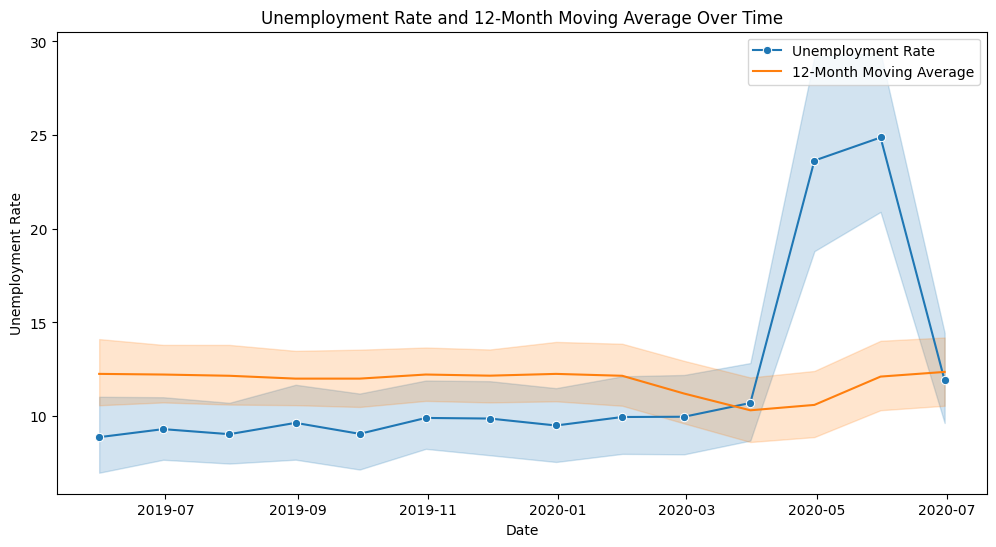

In [15]:
# Convert 'Date' column to datetime 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#  plot the unemployment rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment Rate', marker='o', label='Unemployment Rate')
sns.lineplot(data=df, x='Date', y='Unemployment_MA', label='12-Month Moving Average')
plt.title("Unemployment Rate and 12-Month Moving Average Over Time")
plt.legend()
plt.show()

In [16]:
scaler = MinMaxScaler()
df['Unemployment Rate'] = scaler.fit_transform(df[['Unemployment Rate']])

In [17]:
df_prophet = df[['Date', 'Unemployment Rate']].rename(columns={'Date': 'ds', 'Unemployment Rate': 'y'})
model = Prophet()
model.fit(df_prophet)
forecast = model.predict(df_prophet)

10:17:59 - cmdstanpy - INFO - Chain [1] start processing
10:17:59 - cmdstanpy - INFO - Chain [1] done processing


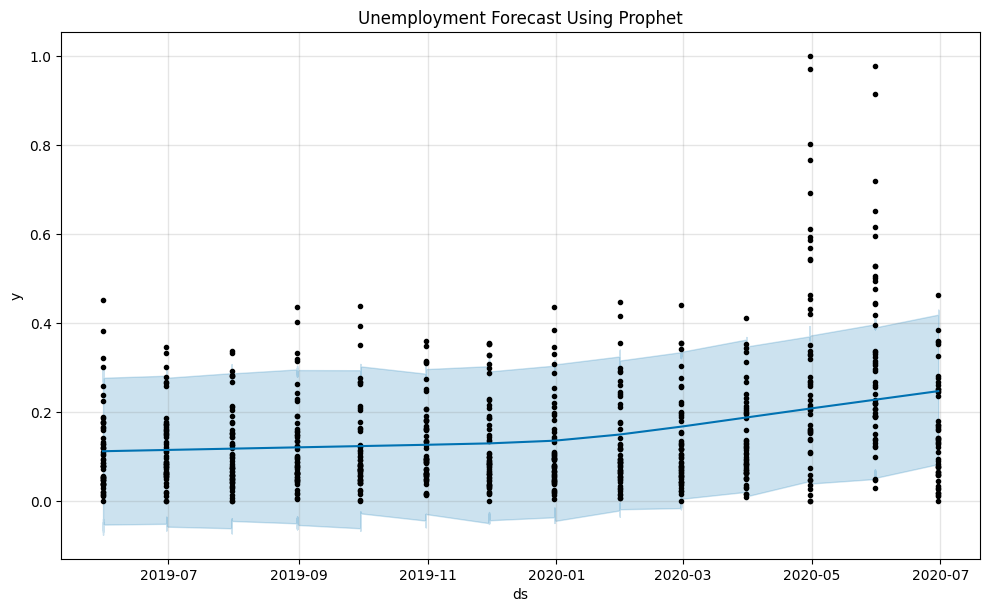

In [18]:
# Plot Forecast
model.plot(forecast)
plt.title("Unemployment Forecast Using Prophet")
plt.show()

In [19]:
model_arima = ARIMA(df['Unemployment Rate'], order=(5, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=5)
print("ARIMA Forecast:", forecast_arima)

c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Forecast: 740    0.126162
741    0.139276
742    0.141276
743    0.147856
744    0.149917
Name: predicted_mean, dtype: float64


c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
